In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store summary data
summaries = []

# Define the path to the outputs directory
outputs_dir = 'outputs'

# Iterate over all directories in the outputs directory
for subdir in os.listdir(outputs_dir):
    subdir_path = os.path.join(outputs_dir, subdir)
    if os.path.isdir(subdir_path):
        summary_file = os.path.join(subdir_path, 'summary.json')
        if os.path.exists(summary_file):
            with open(summary_file, 'r') as f:
                summary_data = json.load(f)
                summaries.append((subdir, summary_data))

# Check if summaries were loaded
if not summaries:
    print("No summary files found.")
else:
    print(f"Loaded {len(summaries)} summary files.")

Loaded 4 summary files.


In [2]:
# Print the summary data for each directory
for subdir, summary_data in summaries:
    print(f"\nSummary for {subdir}:")
    for key, value in summary_data.items():
        print(f"{key}: {value}")


Summary for output_ip_nets:
mean_loss: 0.44708532094955444
mean_accuracy: 0.44708532094955444
mean_auprc: 0.44708532094955444
mean_auroc: 0.44708532094955444
std_loss: 0.06230399012565613
std_accuracy: 0.06230399012565613
std_auprc: 0.06230399012565613
std_auroc: 0.06230399012565613

Summary for output_transformer:
mean_loss: 0.4263128340244293
mean_accuracy: 0.4263128340244293
mean_auprc: 0.4263128340244293
mean_auroc: 0.4263128340244293
std_loss: 0.022362055256962776
std_accuracy: 0.022362055256962776
std_auprc: 0.022362055256962776
std_auroc: 0.022362055256962776

Summary for output_seft:
mean_loss: 0.43087926506996155
mean_accuracy: 0.43087926506996155
mean_auprc: 0.43087926506996155
mean_auroc: 0.43087926506996155
std_loss: 0.0733053907752037
std_accuracy: 0.0733053907752037
std_auprc: 0.0733053907752037
std_auroc: 0.0733053907752037

Summary for output_grud:
mean_loss: 0.42210739850997925
mean_accuracy: 0.42210739850997925
mean_auprc: 0.42210739850997925
mean_auroc: 0.4221073985

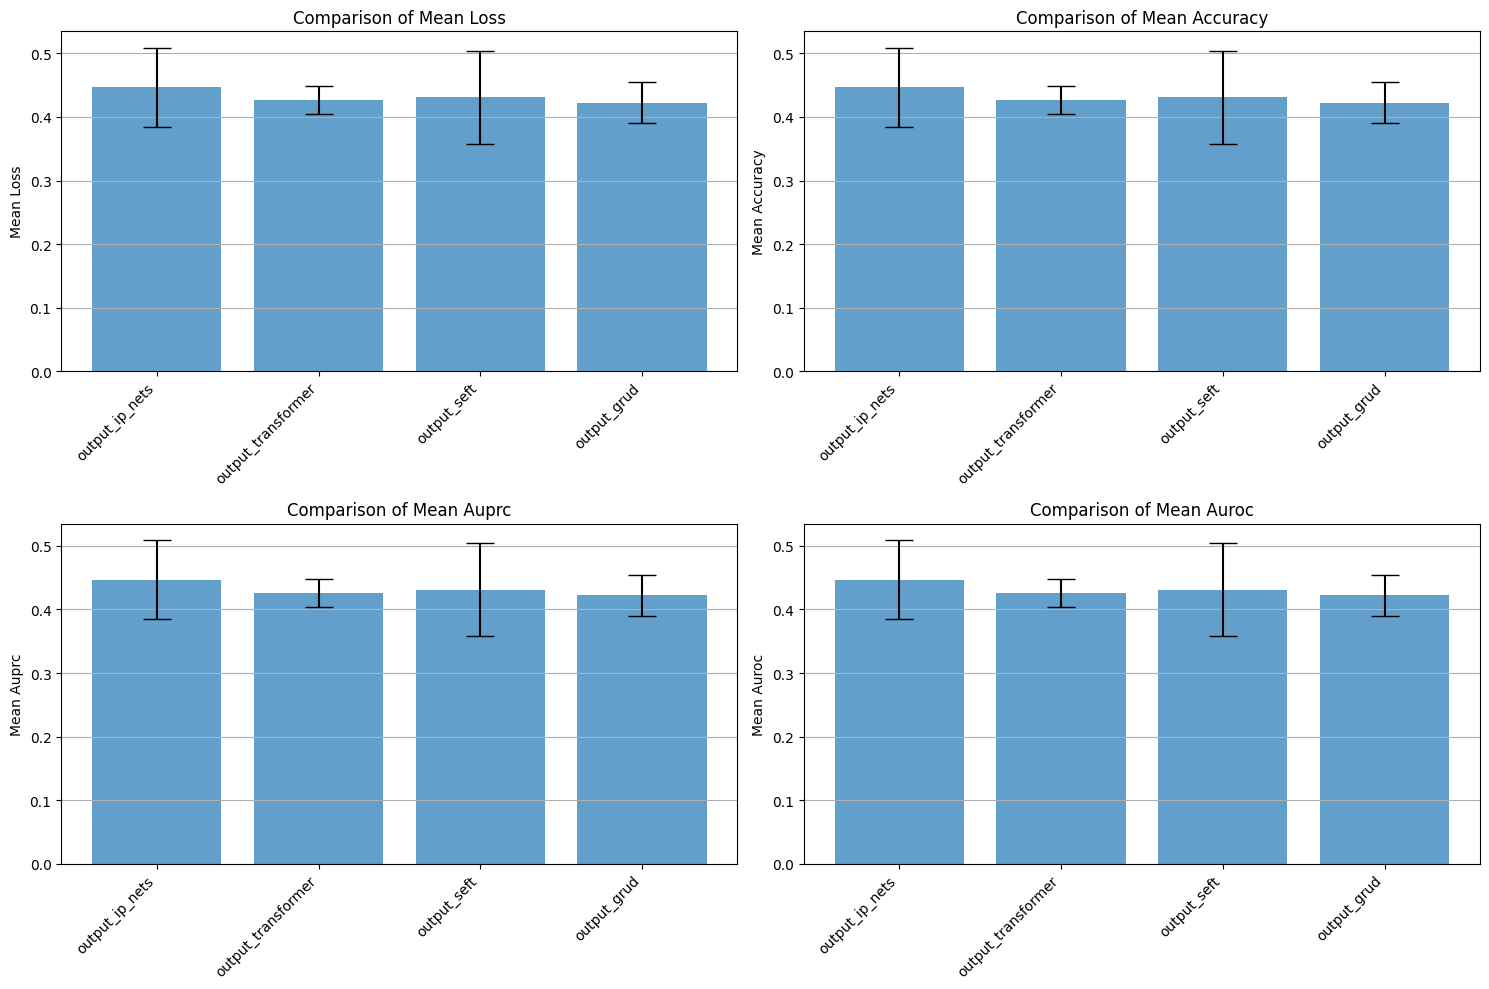

In [3]:
# Extract metrics for comparison
metrics = ['mean_loss', 'mean_accuracy', 'mean_auprc', 'mean_auroc']
metric_values = {metric: [] for metric in metrics}
metric_stds = {metric: [] for metric in metrics}
labels = []

for subdir, summary_data in summaries:
    labels.append(subdir)
    for metric in metrics:
        metric_values[metric].append(summary_data[metric])
        metric_stds[metric].append(summary_data[f'std_{metric.split("_")[1]}'])

# Plot the metrics
x_pos = np.arange(len(labels))

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, metric in enumerate(metrics):
    axs[i].bar(x_pos, metric_values[metric], yerr=metric_stds[metric], align='center', alpha=0.7, ecolor='black', capsize=10)
    axs[i].set_ylabel(metric.replace('_', ' ').title())
    axs[i].set_xticks(x_pos)
    axs[i].set_xticklabels(labels, rotation=45, ha='right')
    axs[i].set_title(f'Comparison of {metric.replace("_", " ").title()}')
    axs[i].yaxis.grid(True)

# Adjust layout and show the figure
plt.tight_layout()
plt.show()